# Application Model Development

In [1]:
import pandas as pd
import numpy as np
import sklearn


In [43]:
df = pd.read_csv('~/Desktop/2020-msia423-liu-xuefei/data/admission.csv')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [18]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## EDA

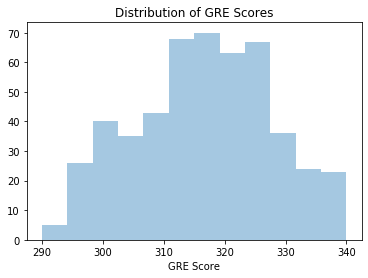

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()



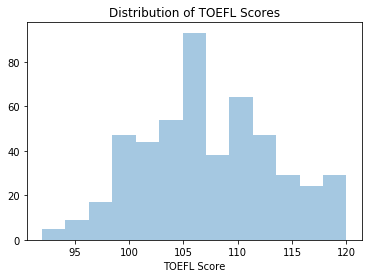

In [10]:
fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()



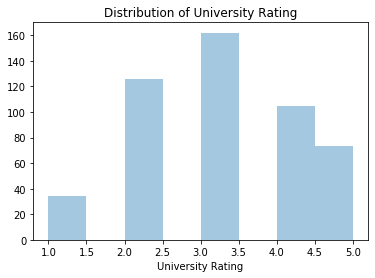

In [11]:
fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()


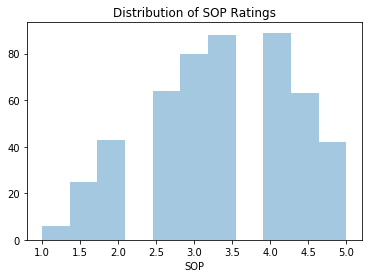

In [12]:

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()



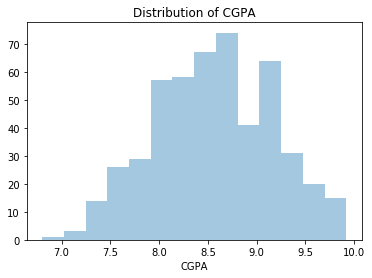

In [13]:
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

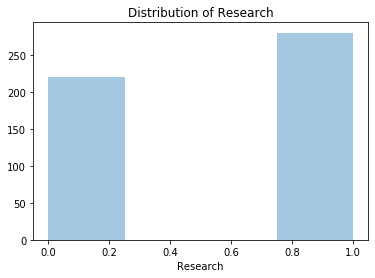

In [40]:
fig = sns.distplot(df['Research'], kde=False)
plt.title("Distribution of Research")
plt.show()

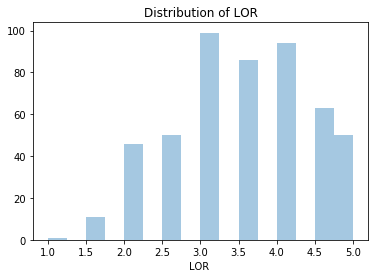

In [38]:
fig = sns.distplot(df['LOR '], kde=False)
plt.title("Distribution of LOR")
plt.show()

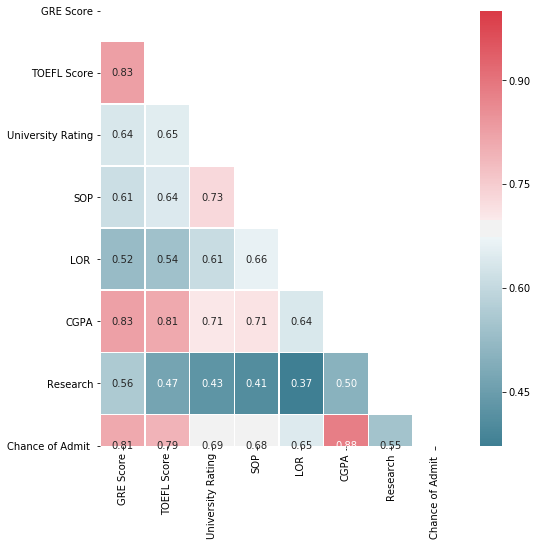

In [41]:

corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Train Model

In [42]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [45]:
Columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
Target = 'Chance of Admit '
X_train, X_test, y_train, y_test = model_selection.train_test_split(
        df[Columns], df[Target], test_size=0.3, random_state=1995)

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [66]:
lr.coef_[0]

0.002069220969673795

In [67]:
lr.coef_

array([ 0.00206922,  0.00290984,  0.00438688, -0.0011966 ,  0.01685315,
        0.12031181,  0.02839816])

In [68]:
lr.intercept_

-1.3640832717853937

In [54]:
fitted = pd.DataFrame([])
fitted['params'] = ['intercept'].append(Columns)
fitted['coefs'] = [lr.intercept_].append(lr.coef_)
fitted

,params,coefs
0,GRE Score,0.002069
1,TOEFL Score,0.002910
2,University Rating,0.004387
3,SOP,-0.001197
4,LOR,0.016853
5,CGPA,0.120312
6,Research,0.028398


In [70]:
fitted = pd.DataFrame([])
fitted['params'] = ['intercept'] + Columns
fitted['coefs'] = np.append(lr.intercept_, lr.coef_)
fitted

,params,coefs
0,intercept,-1.364083
1,GRE Score,0.002069
2,TOEFL Score,0.002910
3,University Rating,0.004387
4,SOP,-0.001197
5,LOR,0.016853
6,CGPA,0.120312
7,Research,0.028398


In [60]:
print(['intercept'] + Columns)

['intercept', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']


In [69]:
np.append(lr.intercept_, lr.coef_)

array([-1.36408327e+00,  2.06922097e-03,  2.90984443e-03,  4.38687559e-03,
       -1.19659861e-03,  1.68531451e-02,  1.20311811e-01,  2.83981647e-02])

In [74]:
fitted['params'][0]

'intercept'

In [76]:
fitted

,params,coefs
0,intercept,-1.364083
1,GRE Score,0.002069
2,TOEFL Score,0.002910
3,University Rating,0.004387
4,SOP,-0.001197
5,LOR,0.016853
6,CGPA,0.120312
7,Research,0.028398


# draft

In [12]:
df.iloc[0:1]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92


In [19]:
a = pd.DataFrame([[1, 337,118,4,4.5,4.5,9.65,1,0.92]], columns=['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '])

In [29]:
a.equals(df.iloc[0:1])

True

In [20]:
a

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92


In [28]:
df.iloc[0:1].values  == a.values

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [23]:
a.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [30]:
df = pd.DataFrame([1,2,3,4,5,6,7,8,9,10], columns=['cgpa'])
col = 'cgpa'

In [31]:
def featurize(df, col):
    """Scale CGPA data from 0-10 to 0-4

    Args:
        df (`DataFrame`): Loaded data
        col (`str`): cgpa column name

    Return:
        df (`DataFrame`): dataframe with gpa scaled to 0-4

    """


    x = df[[col]].values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df[col] = x_scaled * 4
    return df

In [41]:
from sklearn import preprocessing
import numpy as np
df = pd.DataFrame([0,0], columns=['cgpa'])
col = 'cgpa'
result_true = round(pd.DataFrame([0,4], columns=['cgpa']),0)
result_test = featurize(df, col)

In [35]:
result_true

,cgpa
0,0
1,4


In [42]:
round(result_test,0)

,cgpa
0,0.0
1,0.0


In [44]:
df = pd.read_csv('~/Desktop/2020-msia423-liu-xuefei/data/clean.csv')